In [122]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

sns.set(rc={'figure.figsize':(15, 6)})

In [123]:
def preprocess(df):
    """Preprocess data for KMeans clustering"""
    
    #df_log = np.log1p(df)
    scaler = StandardScaler()
    scaler.fit(df)
    df_norm = scaler.transform(df)
    
    return df_norm

In [124]:
def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    df_norm = preprocess(df)
    
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_norm)
        sse[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

In [125]:
def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    
    df_norm = preprocess(df)
    sse = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_norm)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

In [126]:
def run_kmeans(df, increment=0, decrement=0):
    """Run KMeans clustering, including the preprocessing of the data
    and the automatic selection of the optimum k. 
    """
    
    df_norm = preprocess(df)
    k = find_k(df, increment, decrement)
    kmeans = KMeans(n_clusters=k, 
                    random_state=1)
    kmeans.fit(df_norm)
    return df.assign(cluster=kmeans.labels_)

In [238]:
df = pd.read_csv('missesTotal.csv')  

In [239]:
df

,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,emb_1,emb_2,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,0,813,neutral,@united I hope so too,0,813,1,0.701212,0.149414,1.801739,...,-0.641708,-0.631561,0.724360,-0.479683,0.342981,-0.128573,-0.765833,-0.322237,-0.484272,-0.027367
1,1,7130,neutral,@jetblue who's running your tweeter using the ...,0,7130,2,-0.095302,0.519799,-0.860941,...,-0.844507,0.545532,-0.988797,-0.470753,0.221976,-0.781311,0.437286,0.007654,-0.176711,0.090562
2,2,3380,neutral,@united still waiting for a response on whethe...,0,3380,2,0.404428,-0.281564,1.098605,...,0.027952,-0.336490,-0.060362,-0.929268,0.410162,0.116782,-0.160092,-0.028493,-0.795741,0.037037
3,3,3008,neutral,@united Based on suggestions from other passen...,0,3008,2,0.580564,-0.417264,0.539577,...,-0.246741,-1.197115,-0.562455,-0.443025,-0.123202,-0.652523,-0.151871,0.264033,-0.452444,-0.366747
4,4,7030,neutral,“@JetBlue: Our fleet's on fleek. http://t.co/Q...,0,7030,2,0.150641,0.191832,0.901386,...,-0.277474,-0.263758,0.017206,-0.703940,-0.521036,0.051719,0.339595,0.206907,-0.883897,0.368364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,4377,positive,@SouthwestAir @heavenlychc9 I'd at least enjoy...,1,4377,0,-0.288926,-0.469544,0.763421,...,-0.027024,-1.082415,-0.697840,-0.485712,-0.417425,0.451793,-0.545403,-0.404581,-0.650430,0.245911
964,964,5512,positive,@SouthwestAir I'll have to drop by next time I...,1,5512,0,-0.287779,-0.133505,1.637628,...,-0.028515,-0.204185,-0.278846,0.153048,-0.024744,0.142459,-0.391037,-0.188013,-0.114064,0.296878
965,965,56,positive,@VirginAmerica you know it. Need it on my spot...,1,56,0,-0.120062,0.689700,0.500194,...,-0.449935,-0.235210,-0.653002,-1.018101,-0.308710,-0.254051,-0.067138,0.288422,-0.103543,-0.275301
966,966,6239,positive,@SouthwestAir I'm really craving your pretzels...,1,6239,0,-0.466340,0.289625,-0.217530,...,-0.224040,-0.835734,-0.458101,-1.050726,-0.012579,0.600473,-0.229492,0.395023,-0.019480,0.537425


In [240]:
df2 = df[["emb_" + str(i) for i in range(768)]]

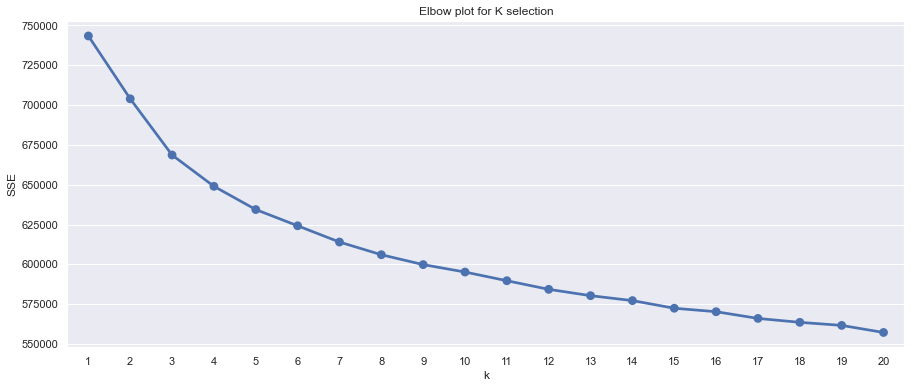

In [241]:
elbow_plot(df2)

In [242]:
find_k(df2)

7

In [243]:
df3 = run_kmeans(df2)

In [244]:
df['cluster'] = df3["cluster"].to_numpy()

In [245]:
df

,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,emb_1,emb_2,...,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767,cluster
0,0,813,neutral,@united I hope so too,0,813,1,0.701212,0.149414,1.801739,...,-0.631561,0.724360,-0.479683,0.342981,-0.128573,-0.765833,-0.322237,-0.484272,-0.027367,3
1,1,7130,neutral,@jetblue who's running your tweeter using the ...,0,7130,2,-0.095302,0.519799,-0.860941,...,0.545532,-0.988797,-0.470753,0.221976,-0.781311,0.437286,0.007654,-0.176711,0.090562,1
2,2,3380,neutral,@united still waiting for a response on whethe...,0,3380,2,0.404428,-0.281564,1.098605,...,-0.336490,-0.060362,-0.929268,0.410162,0.116782,-0.160092,-0.028493,-0.795741,0.037037,5
3,3,3008,neutral,@united Based on suggestions from other passen...,0,3008,2,0.580564,-0.417264,0.539577,...,-1.197115,-0.562455,-0.443025,-0.123202,-0.652523,-0.151871,0.264033,-0.452444,-0.366747,5
4,4,7030,neutral,“@JetBlue: Our fleet's on fleek. http://t.co/Q...,0,7030,2,0.150641,0.191832,0.901386,...,-0.263758,0.017206,-0.703940,-0.521036,0.051719,0.339595,0.206907,-0.883897,0.368364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,963,4377,positive,@SouthwestAir @heavenlychc9 I'd at least enjoy...,1,4377,0,-0.288926,-0.469544,0.763421,...,-1.082415,-0.697840,-0.485712,-0.417425,0.451793,-0.545403,-0.404581,-0.650430,0.245911,0
964,964,5512,positive,@SouthwestAir I'll have to drop by next time I...,1,5512,0,-0.287779,-0.133505,1.637628,...,-0.204185,-0.278846,0.153048,-0.024744,0.142459,-0.391037,-0.188013,-0.114064,0.296878,0
965,965,56,positive,@VirginAmerica you know it. Need it on my spot...,1,56,0,-0.120062,0.689700,0.500194,...,-0.235210,-0.653002,-1.018101,-0.308710,-0.254051,-0.067138,0.288422,-0.103543,-0.275301,5
966,966,6239,positive,@SouthwestAir I'm really craving your pretzels...,1,6239,0,-0.466340,0.289625,-0.217530,...,-0.835734,-0.458101,-1.050726,-0.012579,0.600473,-0.229492,0.395023,-0.019480,0.537425,0


In [249]:
arr_emb = df2.to_numpy()

In [250]:
import umap

In [251]:
mapper = umap.UMAP().fit(arr_emb)
twod = mapper.transform(arr_emb)
twod.shape

(968, 2)

In [252]:
df["x"] = twod[:, 0]
df["y"] = twod[:, 1]

In [253]:
import plotly.express as px

fig = px.scatter(
    df, x='x', y='y', color='cluster', hover_data=['x', 'y', 'text', 'label', 'cluster', 'predicted_label'])

fig.show()

In [254]:
for i in df.loc[(df["label"] == "neutral") & (df["cluster"] == 3)]["text"].to_numpy():
    print(i + '\n')

@united I hope so too

@USAirways thank you for the apology

@united Thanks. Got it straightend out last night.

@united Thank you, ^JH, appreciate the prompt responses--me and other passengers will be doing so.

@USAirways thank you.

@united Okay, thank you both.

@united thanks. That means I have 30 minutes to make my international connection to HKG

@united you'll be hearing from me for sure.

@united I sent in my feedback.  Thank you.

@united it's done.  If you do something to make up for it I'll tweet that too.

@USAirways Y'all need to get it together

@united hi -- @united was. Thank you!

@united thanks

@united got it, look forward to hearing from you soon

@united that's what I thought! Thanks for the clarification!

@united Will do! Thanks!

@USAirways thank you

@united sitting in the middle for the first time .. Hope it works out well

@united Definitely will!

@united Thank you for your response!

@united I'll be impressed if I actually get a response! 😜

@united thank 

In [261]:
queries = ["@united Glad to hear it!", "@USAirways Apology accepted!", "@united Happy to hear that everything got straightened out!", "@united Thank you for the prompt responses, much appreciated!", "@USAirways You're welcome!", "@united Sounds good, thanks for the update.", "@united Hope you make your connection!", "@united Looking forward to hearing from you.", "@united Thank you for submitting your feedback!", "@united Looking forward to seeing what you do to make up for it!", "@USAirways Get it together, guys!", "@united Hi there, thanks for the response!", "@united No problem, glad we could help!", "@united Thanks, keep us posted!", "@united Thanks for the clarification, appreciate it!", "@united Will do, thanks for the info!", "@USAirways Thank you as well!", "@united Hoping you have a comfortable flight!", "@united Definitely appreciate your help!", "@united Thank you for your response, much appreciated!", "@united Crossing my fingers for a response!", "@united Thanks for keeping us in the loop!", "@united Shoutout to @Delta for saving the day!", "@united Thanks for the update, much appreciated!", "@USAirways No problem, glad we could help!", "@USAirways Glad to hear you got your bags back!", "@USAirways It's all good, thanks for the help!", "@USAirways Same here, lol.", "@united Thank you, appreciate it!", "@united Thanks a bunch!", "@united Sounds like a frustrating situation, hope it gets resolved soon!", "@united Thank you, looking forward to your response!", "@united Awesome, thanks so much for your help!"]

In [230]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('stsb-bert-base')

In [262]:
query_vec = sbert_model.encode(queries)

In [263]:
query_vec

array([[ 0.44175893,  0.30014628,  1.5387958 , ...,  0.74888855,
        -0.05347643,  0.02572564],
       [-0.54151773,  0.72170174,  0.94822717, ...,  0.66185427,
         0.05471979,  0.07131195],
       [ 0.2969306 , -0.6216169 ,  1.1630762 , ...,  0.20308727,
        -0.08394965, -0.0434161 ],
       ...,
       [-0.40406147, -0.72339135,  1.698595  , ..., -0.85310113,
        -1.0823201 ,  0.2505586 ],
       [ 0.386872  ,  0.0961652 ,  1.6331828 , ...,  0.59556806,
        -0.7727465 , -0.00685942],
       [ 0.25517753,  0.5664329 ,  1.1161169 , ...,  0.1078286 ,
        -0.3904413 ,  0.24972162]], dtype=float32)

In [264]:
newtwos = mapper.transform(query_vec)

In [265]:
newtwos

array([[-1.38185499e-02,  8.73439121e+00],
       [-2.99338162e-01,  9.66792583e+00],
       [ 3.00690066e-02,  8.89675713e+00],
       [ 2.61459857e-01,  8.98866177e+00],
       [-1.40815482e-01,  9.31278992e+00],
       [ 1.42688021e-01,  8.86186218e+00],
       [ 5.14547527e-01,  8.84188557e+00],
       [ 3.24487597e-01,  9.01133347e+00],
       [ 5.29709421e-02,  9.00070667e+00],
       [ 6.81298316e-01,  8.88523388e+00],
       [ 8.78433049e-01,  8.79589748e+00],
       [ 1.23309851e-01,  8.87493229e+00],
       [ 5.07822745e-02,  8.85738373e+00],
       [ 1.47951439e-01,  8.79493427e+00],
       [ 2.34832568e-03,  9.02089119e+00],
       [ 1.78041041e-01,  8.80474758e+00],
       [-2.03368366e-01,  9.37172985e+00],
       [ 3.25887471e-01,  1.41077166e+01],
       [ 8.55428055e-02,  8.86066341e+00],
       [ 2.54942104e-02,  8.88321590e+00],
       [ 1.62152970e+00,  1.01586571e+01],
       [ 6.88097179e-02,  8.99402714e+00],
       [ 7.13400990e-02,  8.83230591e+00],
       [ 1.

In [260]:
dfnew = df.loc[(df["label"] == "neutral") & (df["cluster"] == 3)][["x", "y"]]
dfnew

,x,y
0,0.587543,8.812499
22,-0.140401,9.539173
56,0.294934,9.028438
72,0.158192,9.556930
74,-0.087530,9.537566
92,0.158613,8.999800
108,3.303024,10.535873
137,0.703109,9.010606
157,0.187854,9.082685
188,0.708104,9.107912


In [82]:
df.loc[df['label'] == 'positive']

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,label,text,category,original_id,predicted_label,emb_0,...,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767,cluster,x,y
324,324,324,324,6840,positive,sooo earlier i said i couldnt fly with you fo...,1,6840,0,-0.155660,...,-1.191289,-0.302810,-0.148592,-0.177926,0.054763,-0.010817,0.627878,5,3.395363,15.495116
325,325,325,325,13384,positive,thanks hoping that by wed I can get back to DFW,1,13384,0,0.778993,...,0.128634,0.230073,0.081046,-0.708278,-0.784081,-0.363848,0.637311,0,0.110970,16.098774
326,326,326,326,2768,positive,all good man it isn't your fault that plane i...,1,2768,2,0.129607,...,-2.403039,-0.656652,0.019882,0.399017,0.637847,-0.436469,0.135851,1,1.643391,14.840198
327,327,327,327,7160,positive,LMAO “: Our fleet's on fleek. http://t.co/aIyC...,1,7160,0,-0.120038,...,-0.617315,-0.397056,0.393941,0.499522,0.374010,-0.553687,-0.062683,3,2.282380,17.267775
328,328,328,328,8954,positive,to offer service from Daytona Beach to New Yo...,1,8954,0,-0.025715,...,0.198055,0.143096,-0.214299,-0.349405,0.046533,-0.118862,-0.106325,3,1.898268,17.464727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,407,407,407,6823,positive,A320 pulling into the gate as the sunrises he...,1,6823,0,-0.246986,...,0.477163,-0.203902,0.268203,-0.028085,0.418982,0.284505,-0.026405,3,2.176193,17.391640
408,408,408,408,378,positive,"For my Grandma Ella's 80th, she would &lt;3 a...",1,378,0,-0.409296,...,-0.453528,0.126615,0.290363,0.115345,0.756548,-0.186284,-0.172374,1,2.449598,14.766312
409,409,409,409,5527,positive,I will do just about anything tO GO TO THE VE...,1,5527,0,-0.383703,...,-0.793519,-0.261575,0.512884,-0.530931,-0.230358,0.056423,0.550610,2,3.782779,12.065850
410,410,410,410,7678,positive,is amazing. Had a short delay. They gave me $...,1,7678,2,-0.381238,...,-1.206835,-0.085316,0.287592,-0.492705,-0.153310,-0.246269,0.217216,1,2.755985,15.005701


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=2, random_state=42)
genre_embedding = tsne.fit_transform(arr_emb)

genre_embedding

In [ ]:
df3["x"] = genre_embedding[:, 0]
df3["y"] = genre_embedding[:, 1]

In [ ]:
df3